## comparing llm output to ground truth story (also generated by llm)

In [47]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# read in data from json
folder = "json/time/"

with open(folder + 'story_outline.json') as f:
    og_data = json.load(f)

In [49]:
with open(folder + 'final_data.json') as f:
    new_data = json.load(f)

In [50]:
# set up variables
og_scenes = og_data['scenes']
og_characters = og_data['characters']
og_locations = og_data['locations']
og_chapters = og_data['chapters']

new_scenes = new_data['scenes']
new_characters = new_data['characters']
new_locations = new_data['locations']
new_chapters = new_data['chapters']

In [51]:
# overall stats
print("Overall Stats")
print("Original Scenes: ", len(og_scenes))
print("New Scenes: ", len(new_scenes))
print()
print("Original Characters: ", len(og_characters))
print("New Characters: ", len(new_characters))
print()
print("Original Locations: ", len(og_locations))
print("New Locations: ", len(new_locations))

Overall Stats
Original Scenes:  58
New Scenes:  59

Original Characters:  20
New Characters:  19

Original Locations:  13
New Locations:  18


In [52]:
# chapter comparison
df = pd.DataFrame()

scenes_per_chap_og = []
scenes_per_chap_new = []
importance_og = []
importance_new = []
conflict_og = []
conflict_new = []
num_locations_og = []
num_locations_new = []
num_characters_og = []
num_characters_new = []

for i, chap in enumerate(og_chapters):
    scenes_per_chap_og.append(chap['scenes']) 
    scenes_per_chap_new.append(new_chapters[i]['scenes'])
    importance_og.append(chap['importance'])
    importance_new.append(new_chapters[i]['importance'])
    conflict_og.append(chap['conflict'])
    conflict_new.append(new_chapters[i]['conflict'])
    num_locations_og.append(len(chap['locations']))
    num_locations_new.append(len(new_chapters[i]['locations']))
    num_characters_og.append(len(chap['characters']))
    num_characters_new.append(len(new_chapters[i]['characters']))

# each row is a chapter
df['Chapter'] = range(1, len(og_chapters) + 1)
df['num_scenes_og'] = scenes_per_chap_og
df['num_scenes_new'] = scenes_per_chap_new
df['importance_og'] = importance_og
df['importance_new'] = importance_new
df['conflict_og'] = conflict_og
df['conflict_new'] = conflict_new
df['num_locations_og'] = num_locations_og
df['num_locations_new'] = num_locations_new
df['num_characters_og'] = num_characters_og
df['num_characters_new'] = num_characters_new

df.head()

,Chapter,num_scenes_og,num_scenes_new,importance_og,importance_new,conflict_og,conflict_new,num_locations_og,num_locations_new,num_characters_og,num_characters_new
0,1,4,4,0.4,0.88,0.2,0.73,2,2,6,5
1,2,5,5,0.5,0.88,0.3,0.72,4,5,7,5
2,3,5,6,0.7,0.87,0.5,0.70,2,3,4,4
3,4,5,5,0.6,0.90,0.6,0.76,3,5,6,6
4,5,5,5,0.5,0.88,0.4,0.72,2,4,3,4


In [53]:
# compute differences
df['diff_scenes'] = df['num_scenes_new'] - df['num_scenes_og'] 
df['diff_importance'] = df['importance_new'] - df['importance_og']
df['diff_conflict'] = df['conflict_new'] - df['conflict_og']
df['diff_locations'] = df['num_locations_new'] - df['num_locations_og']
df['diff_characters'] = df['num_characters_new'] - df['num_characters_og']

df

,Chapter,num_scenes_og,num_scenes_new,importance_og,importance_new,conflict_og,conflict_new,num_locations_og,num_locations_new,num_characters_og,num_characters_new,diff_scenes,diff_importance,diff_conflict,diff_locations,diff_characters
0,1,4,4,0.4,0.88,0.2,0.73,2,2,6,5,0,0.48,0.53,0,-1
1,2,5,5,0.5,0.88,0.3,0.72,4,5,7,5,0,0.38,0.42,1,-2
2,3,5,6,0.7,0.87,0.5,0.70,2,3,4,4,1,0.17,0.20,1,0
3,4,5,5,0.6,0.90,0.6,0.76,3,5,6,6,0,0.30,0.16,2,0
4,5,5,5,0.5,0.88,0.4,0.72,2,4,3,4,0,0.38,0.32,2,1
5,6,5,5,0.8,0.88,0.7,0.76,3,3,5,5,0,0.08,0.06,0,0
6,7,5,4,0.4,0.90,0.4,0.75,3,3,4,4,-1,0.50,0.35,0,0
7,8,5,5,0.7,0.92,0.8,0.82,4,4,5,5,0,0.22,0.02,0,0
8,9,5,5,0.6,0.86,0.6,0.68,3,3,4,5,0,0.26,0.08,0,1
9,10,5,6,1.0,0.92,1.0,0.82,3,3,4,3,1,-0.08,-0.18,0,-1


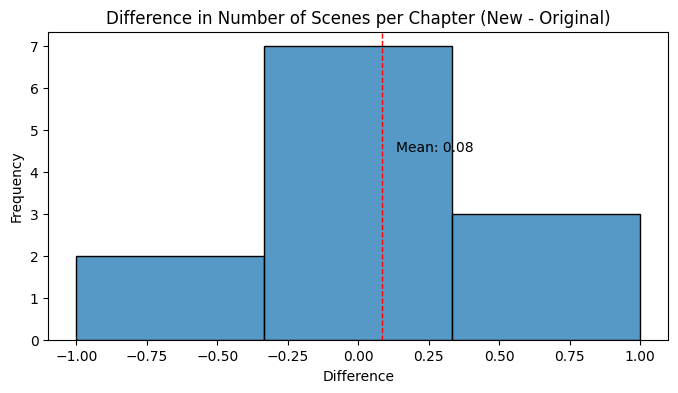

In [54]:
# plot histogram of diff_scenes
# make the plot aesthetic
# and show the mean

plt.figure(figsize=(8, 4))
sns.histplot(df['diff_scenes'], bins=3)
plt.axvline(df['diff_scenes'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_scenes'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_scenes'].mean()))
plt.title("Difference in Number of Scenes per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

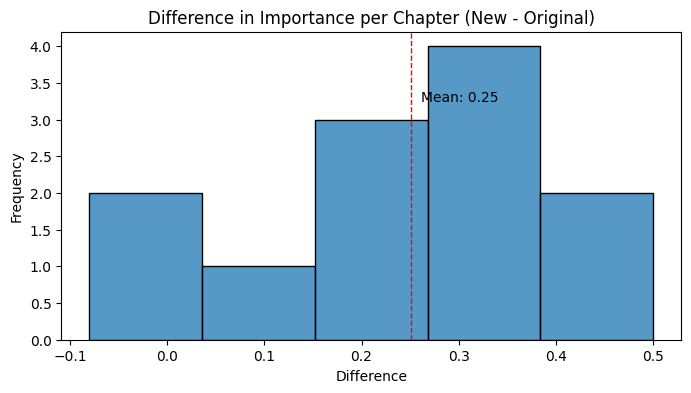

In [55]:
# plot histogram of diff_importance
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_importance'])
plt.axvline(df['diff_importance'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_importance'].mean() + 0.01, 3.25, 'Mean: {:.2f}'.format(df['diff_importance'].mean()))
plt.title("Difference in Importance per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

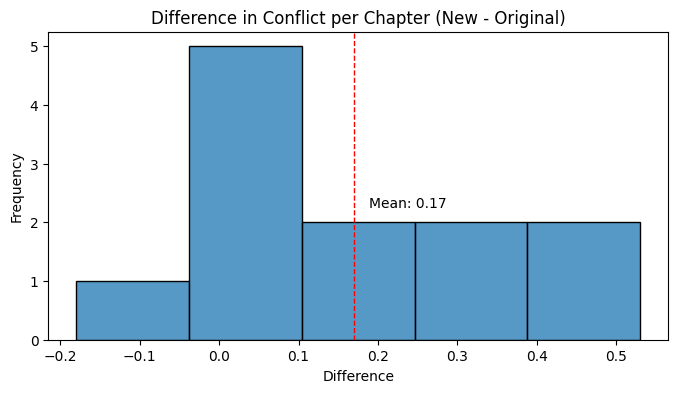

In [56]:
# plot histogram of diff_conflict
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_conflict'])
plt.axvline(df['diff_conflict'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_conflict'].mean() + 0.02, 2.25, 'Mean: {:.2f}'.format(df['diff_conflict'].mean()))
plt.title("Difference in Conflict per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

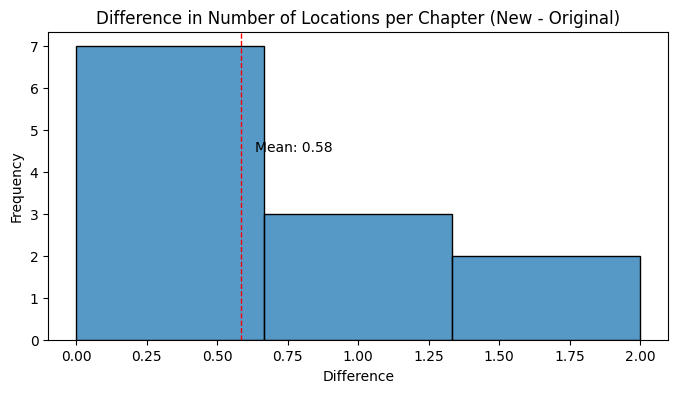

In [57]:
# plot histogram of diff_locations
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_locations'], bins=3)
plt.axvline(df['diff_locations'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_locations'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_locations'].mean()))
plt.title("Difference in Number of Locations per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

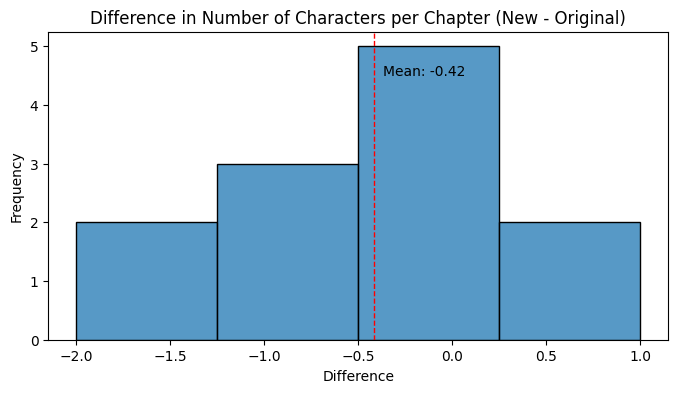

In [58]:
# plot histogram of diff_characters
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_characters'], bins=4)
plt.axvline(df['diff_characters'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_characters'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_characters'].mean()))
plt.title("Difference in Number of Characters per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

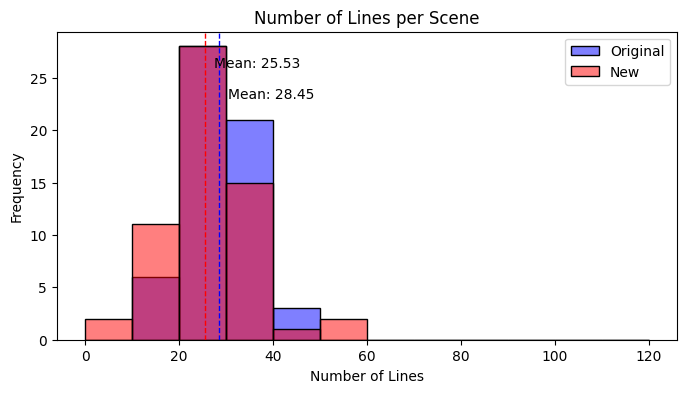

In [59]:
# collect num_lines for each scene
num_lines_og = []
num_lines_new = []

for scene in og_scenes:
    num_lines_og.append(scene['last_line'] - scene['first_line'] + 1)

for scene in new_scenes:
    num_lines_new.append(scene['num_lines'])

# plot both histograms on the same plot
plt.figure(figsize=(8, 4))
sns.histplot(num_lines_og, color='blue', binwidth=10, alpha=0.5, binrange=[0,120], label='Original')
# add mean line
plt.axvline(sum(num_lines_og) / len(num_lines_og), color='blue', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_lines_og) / len(num_lines_og) + 2, 23, 'Mean: {:.2f}'.format(sum(num_lines_og) / len(num_lines_og)))
sns.histplot(num_lines_new, color='red', binwidth=10, alpha=0.5, binrange=[0,120], label='New')
# add mean line
plt.axvline(sum(num_lines_new) / len(num_lines_new), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_lines_new) / len(num_lines_new) + 2, 26, 'Mean: {:.2f}'.format(sum(num_lines_new) / len(num_lines_new)))
plt.title("Number of Lines per Scene")
plt.xlabel("Number of Lines")
plt.ylabel("Frequency")
plt.legend()
plt.show()
    

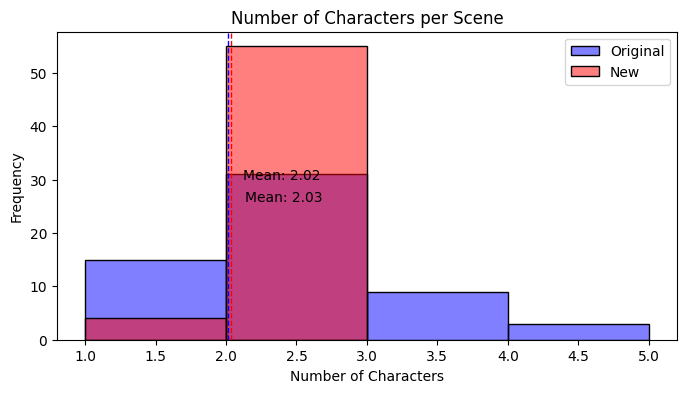

In [60]:
# collect number of characters for each scene
num_characters_og = []
num_characters_new = []

for scene in og_scenes:
    num_characters_og.append(len(scene['characters']))

for scene in new_scenes:
    num_characters_new.append(len(scene['characters']))

# plot both histograms on the same plot
plt.figure(figsize=(8, 4))
sns.histplot(num_characters_og, color='blue', binwidth=1, alpha=0.5, label='Original')
# add mean line
plt.axvline(sum(num_characters_og) / len(num_characters_og), color='blue', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_characters_og) / len(num_characters_og) + 0.1, 30, 'Mean: {:.2f}'.format(sum(num_characters_og) / len(num_characters_og)))
sns.histplot(num_characters_new, color='red', binwidth=1, alpha=0.5, label='New')
# add mean line
plt.axvline(sum(num_characters_new) / len(num_characters_new), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_characters_new) / len(num_characters_new) + 0.1, 26, 'Mean: {:.2f}'.format(sum(num_characters_new) / len(num_characters_new)))
plt.title("Number of Characters per Scene")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend()
plt.show()